Evaluating Logistic Regression for y_stableFlag...

Evaluating Logistic Regression...

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.98      0.94      0.95       294
           1       0.88      0.95      0.92       147

    accuracy                           0.94       441
   macro avg       0.93      0.94      0.93       441
weighted avg       0.94      0.94      0.94       441



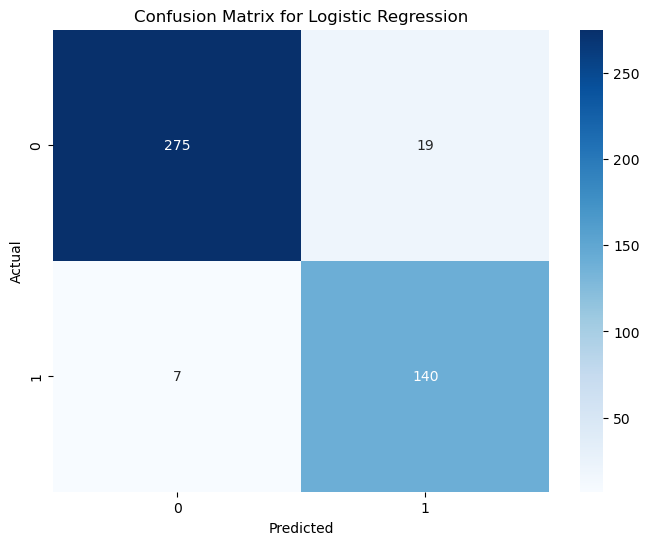

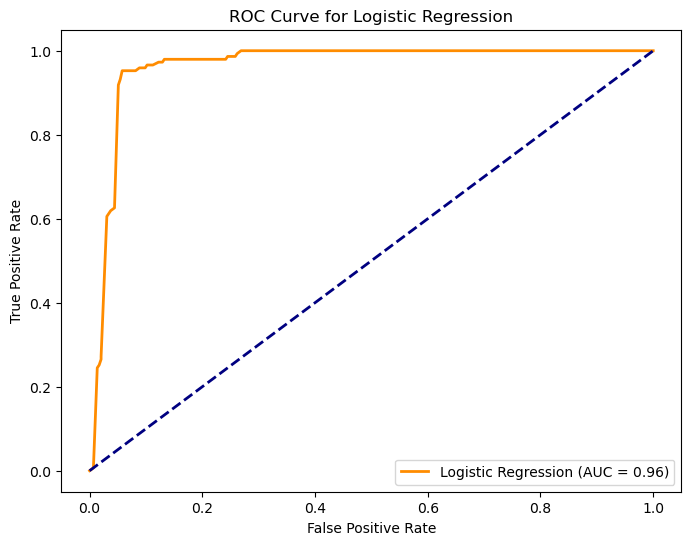

--------------------------------------------------
--------------------------------------------------
Evaluating K-Nearest Neighbors for y_stableFlag...

Evaluating K-Nearest Neighbors...

Classification Report for K-Nearest Neighbors:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       294
           1       0.91      0.88      0.89       147

    accuracy                           0.93       441
   macro avg       0.92      0.92      0.92       441
weighted avg       0.93      0.93      0.93       441



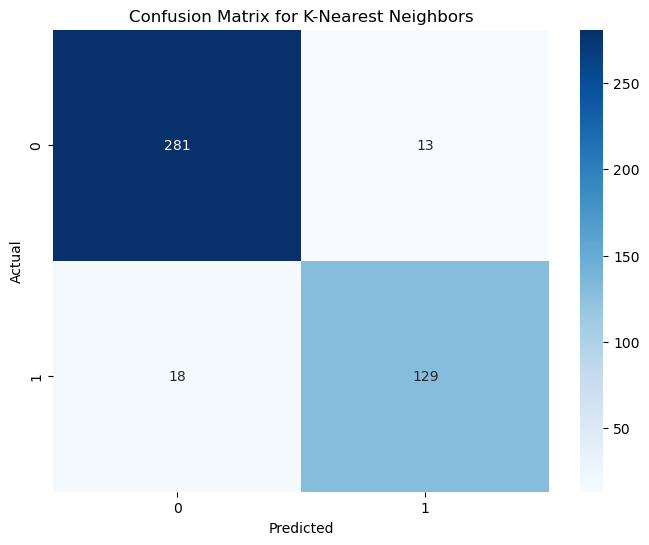

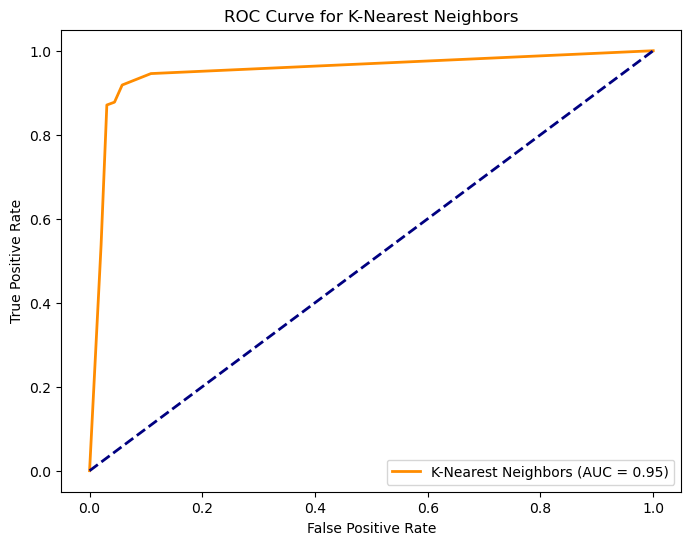

--------------------------------------------------
--------------------------------------------------
Evaluating Support Vector Machine for y_stableFlag...

Evaluating Support Vector Machine...

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       0.98      0.94      0.95       294
           1       0.88      0.95      0.92       147

    accuracy                           0.94       441
   macro avg       0.93      0.94      0.93       441
weighted avg       0.94      0.94      0.94       441



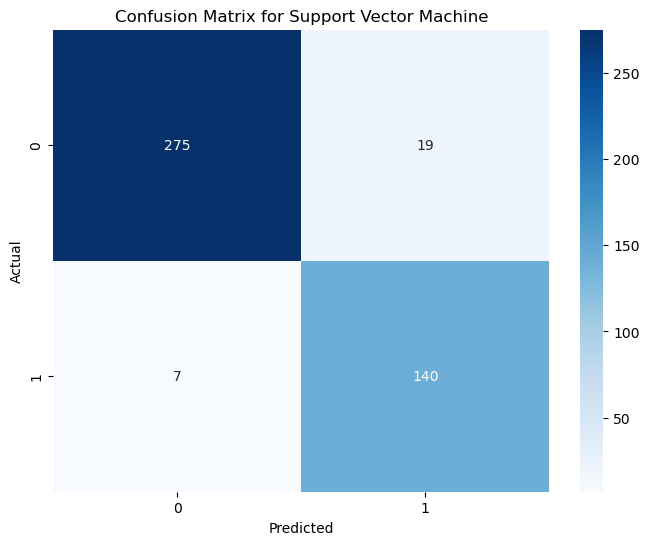

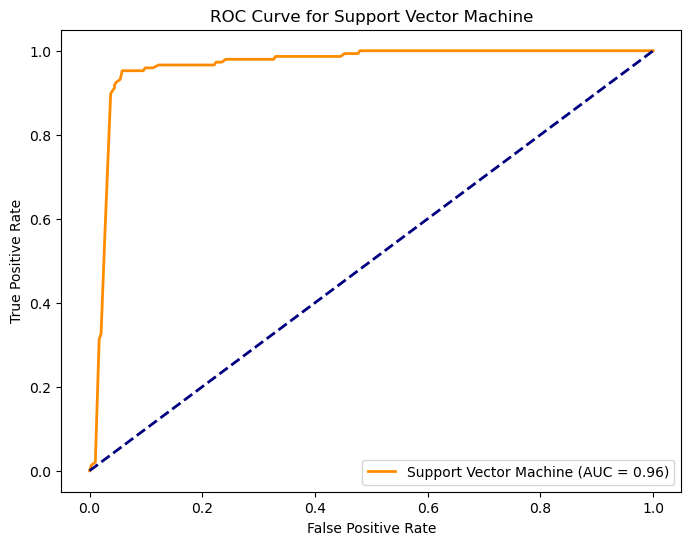

--------------------------------------------------
--------------------------------------------------
Evaluating Naive Bayes for y_stableFlag...

Evaluating Naive Bayes...

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       294
           1       0.78      0.98      0.87       147

    accuracy                           0.90       441
   macro avg       0.89      0.92      0.90       441
weighted avg       0.92      0.90      0.90       441



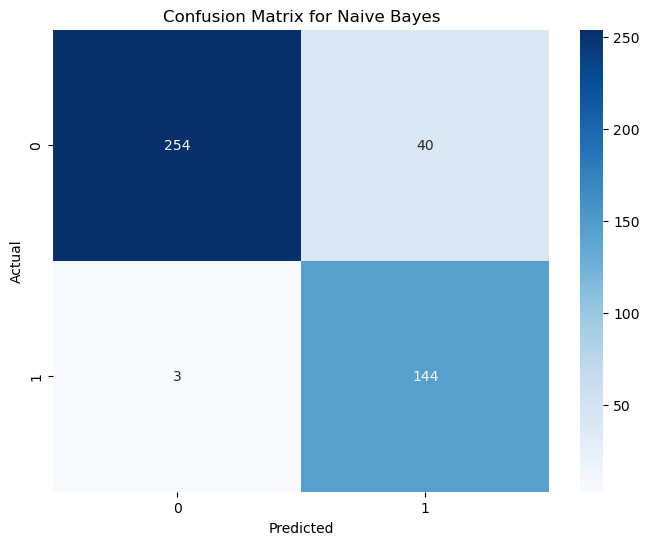

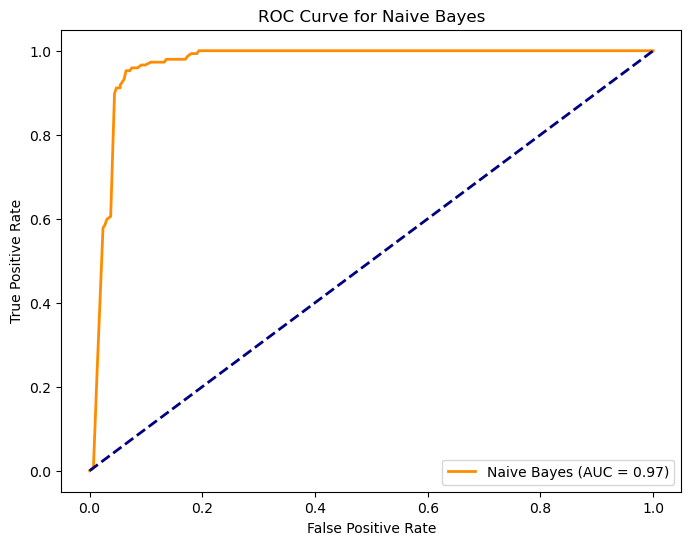

--------------------------------------------------
--------------------------------------------------
Evaluating Decision Tree for y_stableFlag...

Evaluating Decision Tree...

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       294
           1       0.89      0.90      0.89       147

    accuracy                           0.93       441
   macro avg       0.92      0.92      0.92       441
weighted avg       0.93      0.93      0.93       441



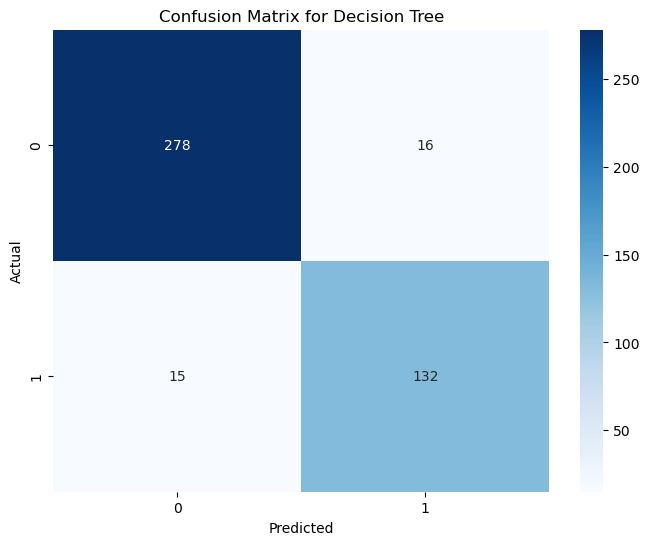

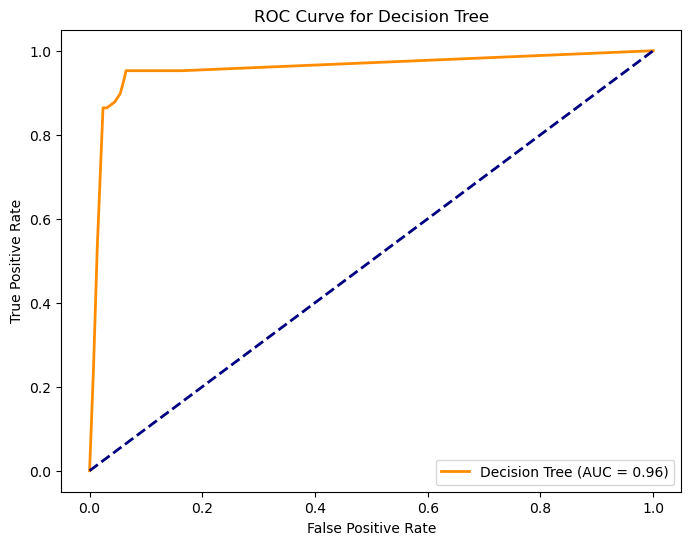

--------------------------------------------------
--------------------------------------------------
Evaluating Random Forest for y_stableFlag...

Evaluating Random Forest...

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       294
           1       0.88      0.93      0.90       147

    accuracy                           0.93       441
   macro avg       0.92      0.93      0.93       441
weighted avg       0.94      0.93      0.93       441



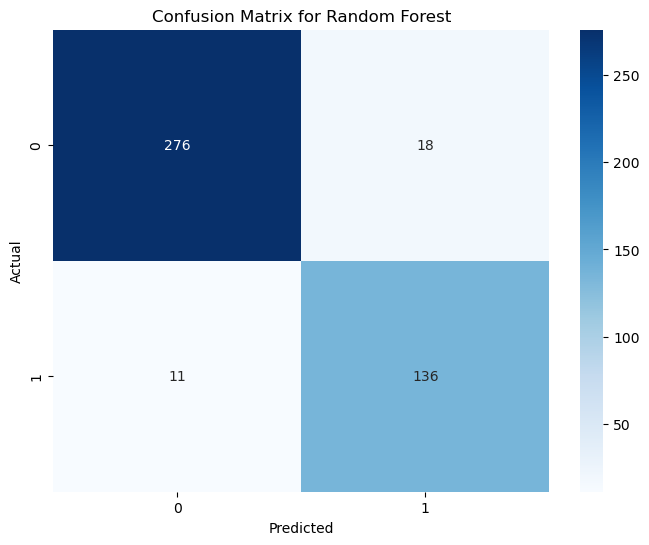

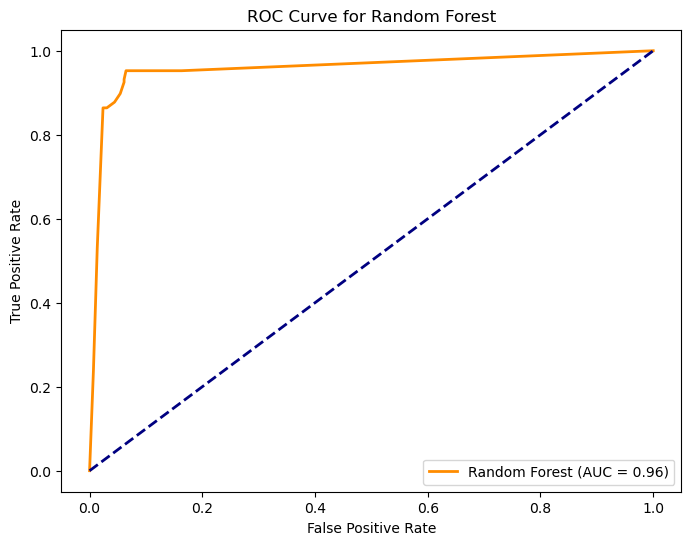

--------------------------------------------------
--------------------------------------------------
Evaluating Bagging for y_stableFlag...

Evaluating Bagging...

Classification Report for Bagging:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       294
           1       0.89      0.90      0.90       147

    accuracy                           0.93       441
   macro avg       0.92      0.93      0.92       441
weighted avg       0.93      0.93      0.93       441



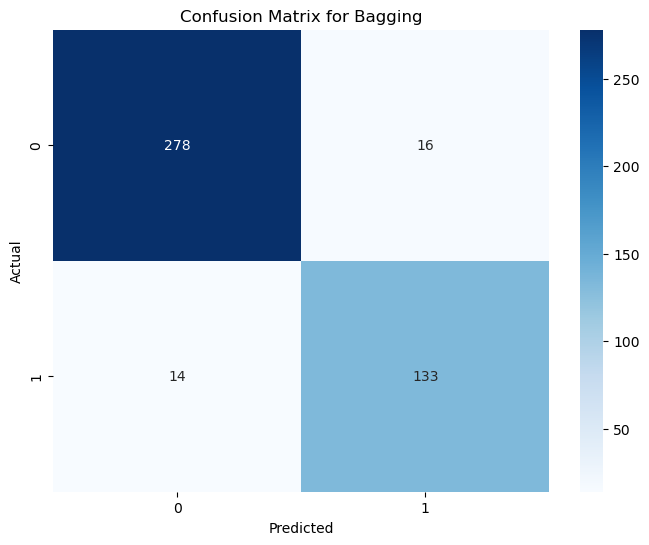

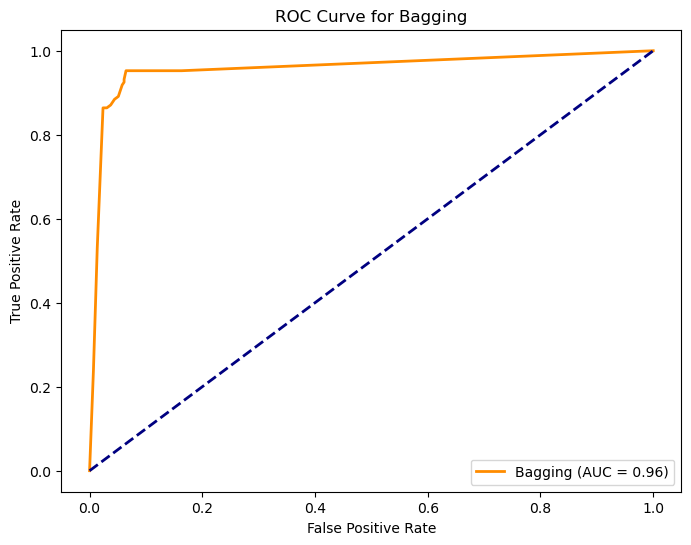

--------------------------------------------------
--------------------------------------------------
Evaluating Gradient Boosting for y_stableFlag...

Evaluating Gradient Boosting...

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       294
           1       0.89      0.92      0.91       147

    accuracy                           0.94       441
   macro avg       0.93      0.93      0.93       441
weighted avg       0.94      0.94      0.94       441



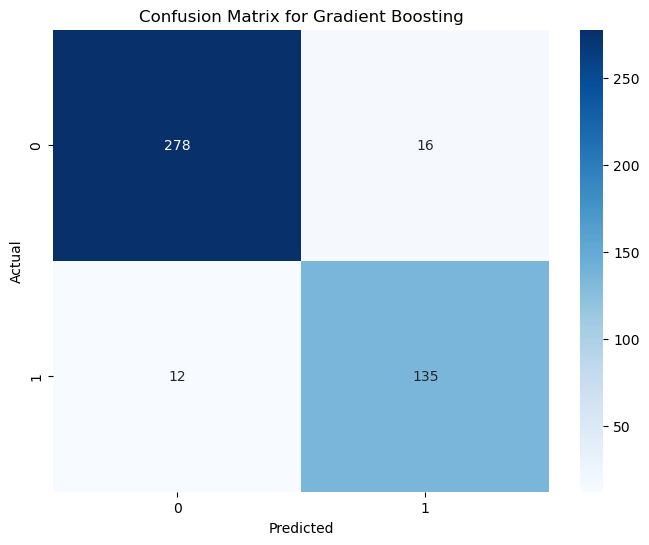

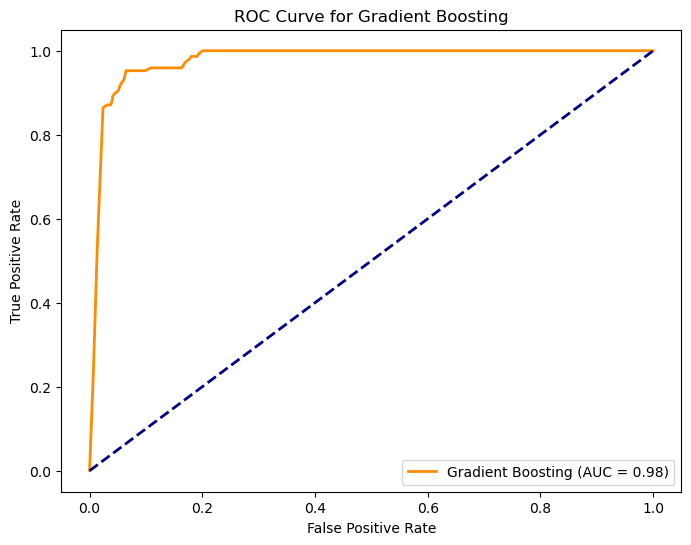

--------------------------------------------------
--------------------------------------------------


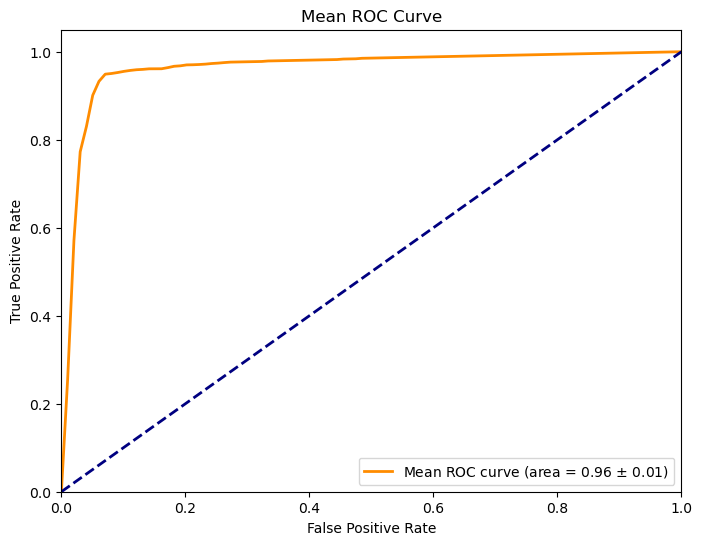

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the data
df = pd.read_csv(r"C:\Users\ajayk\Desktop\Machine Learning\Condition_Monitoring_of_Hydraulic_System.csv")

# Separate features (X1) and target (y1)
X1 = df[['y_coolerCondition', 'y_valveCondition', 'y_pumpLeak', 'y_hydraulicAcc']]
y1 = df[['y_stableFlag']]

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# evaluate_classifier function
def evaluate_classifier(y_true, y_pred, classifier_name):
    print(f"Evaluating {classifier_name}...\n")
    print(f"Classification Report for {classifier_name}:\n")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Heatmap for Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=np.unique(y_true),
        yticklabels=np.unique(y_true),
    )
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_true, classifier.predict_proba(X1_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{classifier_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc="lower right")
    plt.show()

    print("-" * 50)

# Evaluation functions
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define mean_fpr, tpr_all, and aucs before the loop
mean_fpr = np.linspace(0, 1, 100)
tpr_all = []
aucs = []

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"Evaluating {classifier_name} for y_stableFlag...\n")

    # Train the classifier on y_stableFlag
    classifier.fit(X1_train_scaled, y1_train.values.ravel())

    # Make predictions
    y1_pred = classifier.predict(X1_test_scaled)

    # Use the evaluate_classifier function
    evaluate_classifier(y1_test, y1_pred, classifier_name)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y1_test, classifier.predict_proba(X1_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Ensure the ROC curve is fully drawn
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tpr_all.append(tpr_interp)

    # Store AUC
    aucs.append(roc_auc)

    print("-" * 50)

# Compute mean and standard deviation of TPR
mean_tpr = np.mean(tpr_all, axis=0)
mean_auc = np.mean(aucs)
std_auc = np.std(aucs)

# Plot Mean ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='Mean ROC curve (area = {:.2f} $\pm$ {:.2f})'.format(mean_auc, std_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Mean ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [8]:
# Manually provide input values for y_flag features
manual_input_values_y_flag = {
    'y_coolerCondition': 3,
    'y_valveCondition': 90,
    'y_pumpLeak': 2,
    'y_hydraulicAcc': 100
}

# Convert manual input values to a DataFrame
manual_input_df_y_flag = pd.DataFrame([manual_input_values_y_flag])

# Standardize the manual input values using the same scaler
manual_input_scaled_y_flag = scaler.transform(manual_input_df_y_flag)

# Get predictions for each classifier
manual_predictions_y_flag = {}
for classifier_name, classifier in classifiers.items():
    # Make predictions for the manual input
    prediction = classifier.predict(manual_input_scaled_y_flag)
    manual_predictions_y_flag[classifier_name] = prediction[0]

# Display manual predictions
print("\nManual Predictions for Input:", manual_input_values_y_flag)
for classifier_name, prediction in manual_predictions_y_flag.items():
    print(f"{classifier_name}: {prediction}")



Manual Predictions for Input: {'y_coolerCondition': 3, 'y_valveCondition': 90, 'y_pumpLeak': 2, 'y_hydraulicAcc': 100}
Logistic Regression: 0
K-Nearest Neighbors: 0
Support Vector Machine: 0
Naive Bayes: 0
Decision Tree: 0
Random Forest: 0
Bagging: 0
Gradient Boosting: 0
